In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('loans_full_schema.csv')
df.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [119]:
df_new = df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint','tax_liens',
                  'initial_listing_status','disbursement_method','sub_grade','months_since_last_credit_inquiry','months_since_last_delinq'],axis=1)


In [120]:
df_new = df_new.replace(np.nan,0)

In [121]:
df_new.isna().sum()


emp_title                       0
emp_length                      0
state                           0
homeownership                   0
annual_income                   0
verified_income                 0
debt_to_income                  0
delinq_2y                       0
earliest_credit_line            0
inquiries_last_12m              0
total_credit_lines              0
open_credit_lines               0
total_credit_limit              0
total_credit_utilized           0
num_collections_last_12m        0
num_historical_failed_to_pay    0
months_since_90d_late           0
current_accounts_delinq         0
total_collection_amount_ever    0
current_installment_accounts    0
accounts_opened_24m             0
num_satisfactory_accounts       0
num_accounts_120d_past_due      0
num_accounts_30d_past_due       0
num_active_debit_accounts       0
total_debit_limit               0
num_total_cc_accounts           0
num_open_cc_accounts            0
num_cc_carrying_balance         0
num_mort_accou

In [122]:
df_new.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,interest_rate,installment,grade,issue_month,loan_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,14.07,652.53,C,Mar-2018,Current,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,12.61,167.54,C,Feb-2018,Current,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,17.09,71.40,D,Feb-2018,Current,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,6.72,664.19,A,Jan-2018,Current,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,14.07,786.87,C,Mar-2018,Current,21430.15,2324.65,1569.85,754.80,0.0


In [123]:
df_new.nunique()

emp_title                       4742
emp_length                        11
state                             50
homeownership                      3
annual_income                   1463
verified_income                    3
debt_to_income                  3673
delinq_2y                         12
earliest_credit_line              53
inquiries_last_12m                26
total_credit_lines                78
open_credit_lines                 45
total_credit_limit              9119
total_credit_utilized           9497
num_collections_last_12m           4
num_historical_failed_to_pay       9
months_since_90d_late            107
current_accounts_delinq            2
total_collection_amount_ever     896
current_installment_accounts      30
accounts_opened_24m               26
num_satisfactory_accounts         45
num_accounts_120d_past_due         1
num_accounts_30d_past_due          2
num_active_debit_accounts         25
total_debit_limit               1222
num_total_cc_accounts             56
n

In [124]:
new_data = df_new.drop(['total_collection_amount_ever','state', 'earliest_credit_line', 'months_since_90d_late','num_mort_accounts', 
'account_never_delinq_percent','application_type','paid_late_fees','paid_interest', 'paid_principal'],axis=1)


In [129]:
new_data.head()

,emp_title,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,...,loan_purpose,loan_amount,term,interest_rate,installment,grade,issue_month,loan_status,balance,paid_total
0,global config engineer,3.0,MORTGAGE,90000.0,Verified,18.01,0,6,28,10,...,moving,28000,60,14.07,652.53,C,Mar-2018,Current,27015.86,1999.33
1,warehouse office clerk,10.0,RENT,40000.0,Not Verified,5.04,0,1,30,14,...,debt_consolidation,5000,36,12.61,167.54,C,Feb-2018,Current,4651.37,499.12
2,assembly,3.0,RENT,40000.0,Source Verified,21.15,0,4,31,10,...,other,2000,36,17.09,71.40,D,Feb-2018,Current,1824.63,281.80
3,customer service,1.0,RENT,30000.0,Not Verified,10.16,0,0,4,4,...,debt_consolidation,21600,36,6.72,664.19,A,Jan-2018,Current,18853.26,3312.89
4,security supervisor,10.0,RENT,35000.0,Verified,57.96,0,7,22,16,...,credit_card,23000,36,14.07,786.87,C,Mar-2018,Current,21430.15,2324.65


In [135]:
nwd = new_data.corr()

<AxesSubplot:>

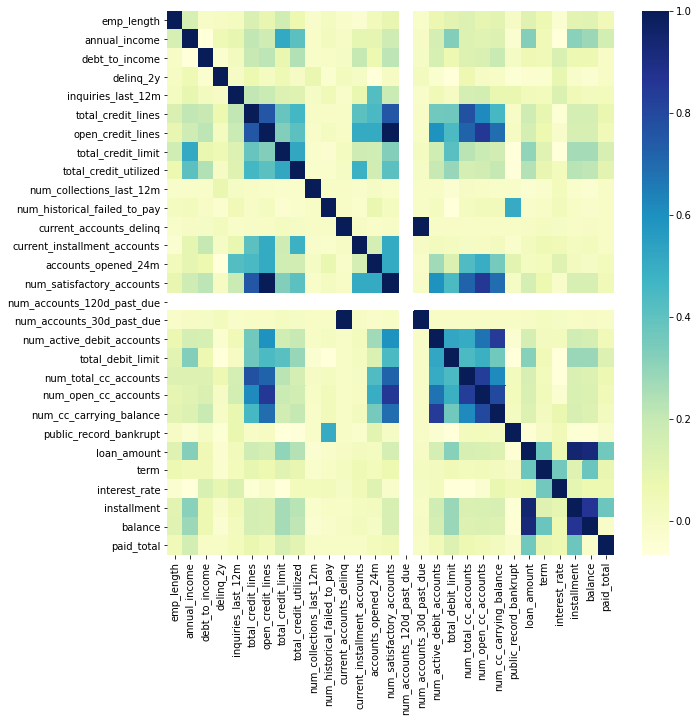

In [139]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(nwd,cmap="YlGnBu",robust=True)

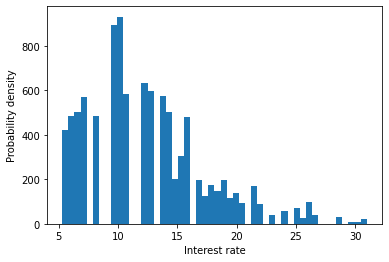

In [152]:
plt.hist(new_data['interest_rate'],bins=50)
plt.xlabel('Interest rate')
plt.ylabel('Probability density')
plt.show()

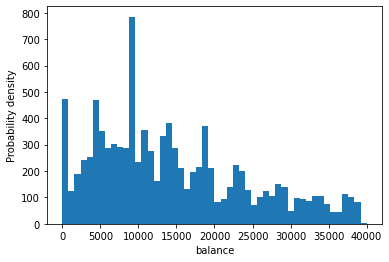

In [153]:
plt.hist(new_data['balance'],bins=50)
plt.xlabel('balance')
plt.ylabel('Probability density')
plt.show()

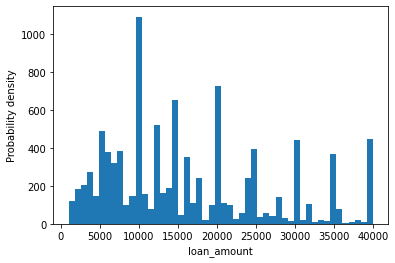

In [155]:
plt.hist(new_data['loan_amount'],bins=50)
plt.xlabel('loan_amount')
plt.ylabel('Probability density')
plt.show()

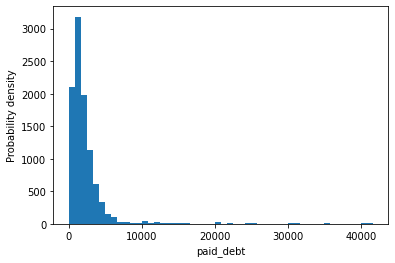

In [156]:
plt.hist(new_data['paid_total'],bins=50)
plt.xlabel('paid_debt')
plt.ylabel('Probability density')
plt.show()

In [157]:
new_data['loan_amount'].sum()

163619225

In [159]:
new_data['paid_total'].sum()

24942347.733001955

In [160]:
new_data['balance'].sum()

144589166.1

In [166]:
print(new_data['loan_amount'],new_data['balance'],new_data['paid_total'])

0       28000
1        5000
2        2000
3       21600
4       23000
        ...  
9995    24000
9996    10000
9997    30000
9998    24000
9999    12800
Name: loan_amount, Length: 10000, dtype: int64 0       27015.86
1        4651.37
2        1824.63
3       18853.26
4       21430.15
          ...   
9995    21586.34
9996     9147.44
9997    27617.65
9998    21518.12
9999    11574.83
Name: balance, Length: 10000, dtype: float64 0       1999.33
1        499.12
2        281.80
3       3312.89
4       2324.65
         ...   
9995    2969.80
9996    1456.31
9997    4620.80
9998    2873.31
9999    1658.56
Name: paid_total, Length: 10000, dtype: float64


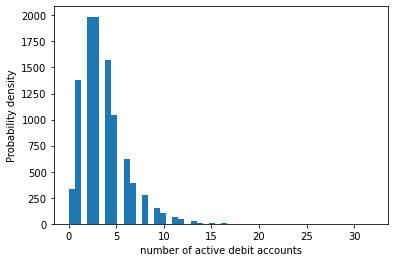

In [170]:
plt.hist(new_data['num_active_debit_accounts'],bins=50)
plt.xlabel(' number of active debit accounts ')
plt.ylabel('Probability density')
plt.show()

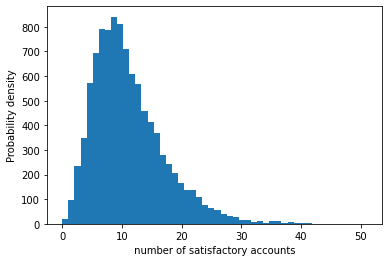

In [174]:
plt.hist(new_data['num_satisfactory_accounts'],bins=50)
plt.xlabel(' number of satisfactory accounts ')
plt.ylabel('Probability density')
plt.show()

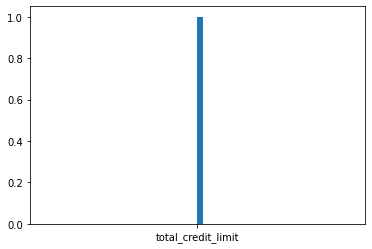